In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

def split(x, y, train_size):
    indexes = [i for i in range(len(x[0]))]
    random.shuffle(indexes)

    train_size = round(len(x[0])*train_size)

    x=np.array(x)
    y = np.array(y)

    x_train = []
    x_test = []

    for feature in x:
        x_train.append(feature[indexes[:train_size]])
        x_test.append(feature[indexes[train_size:]])
    x_train, x_test = np.array(x_train), np.array(x_test)

    y_train = y[indexes[:train_size]]
    y_test = y[indexes[train_size:]]

    return x_train, x_test, y_train, y_test

# leemos el archivo casas.csv
df = pd.read_csv('casas.csv')

""" # hacemos shuffle de los datos
df = df.sample(frac=1, random_state=0)

# tomamos el 70% de los datos para entrenamiento
train = df[:int(len(df)*0.7)]

# tomamos el 30% de los datos para validación
test = df[int(len(df)*0.7):] """

X = np.array(df['Terreno (m2)'])
Y = np.array(df['Precio (MDP)'])

random.seed(0)

X_train, X_test, Y_train, Y_test = split([X, ], Y, 0.7)

train = pd.DataFrame({'Terreno (m2)': X_train[0], 'Precio (MDP)': Y_train})
test = pd.DataFrame({'Terreno (m2)': X_test[0], 'Precio (MDP)': Y_test})

print('train:', (train))
print('test:', (test))

train:    Terreno (m2)  Precio (MDP)
0         625.0          1.44
1         708.0          1.63
2         616.0          1.42
3         255.0          0.59
4         963.0          2.21
5         431.0          0.99
6         381.0          0.88
test:    Terreno (m2)  Precio (MDP)
0         440.0          1.01
1         468.0          1.08
2         594.0          1.37


Creamos el algoritmo de BGD

In [75]:
w = 0
alpha = 0.00000007
y = lambda x: w * x # función de regresión lineal
y_pred = [] # predicciones
ws = [] # pesos
error = [] # error de estimación
x_real = train['Terreno (m2)']
y_real = train['Precio (MDP)']
x_real_test = test['Terreno (m2)']
y_real_test = test['Precio (MDP)']


# ejecutamos las iteraciones de BGD
for i in range(5):
    # calculamos el peso
    w = w - 2*alpha * np.dot((w * x_real - y_real), x_real)
    # calculamos una predicción
    y_pred.append(y(x_real_test))
    # calculamos el error de estimación
    error.append(np.sum(abs(y(x_real_test) - y_real_test)))
    # guardamos el peso
    ws.append(w)

# impiirmos los pesos
print('ws:', *ws, end='\n\n', sep='\n')

# imprimimos las predicciones
for i in range(len(y_pred)):
    print('y_pred:', *y_pred[i], end='\n')

# imprimimos el error
print('\nerror:', *error, end='\n', sep='\n')


ws:
0.0008357174000000002
0.001367858331727804
0.0017066977183675166
0.0019224528371583115
0.0020598343610303484

y_pred: 0.36771565600000006 0.3911157432000001 0.4964161356000001
y_pred: 0.6018576659602338 0.6401576992486123 0.8125078490463157
y_pred: 0.7509469960817073 0.7987345321959978 1.0137784447103049
y_pred: 0.845879248349657 0.8997079277900898 1.1419369852720371
y_pred: 0.9063271188533533 0.9640024809622031 1.223541610452027

error:
2.2047524652
1.4054767857448383
0.8965400270119902
0.5724758385882163
0.3661287897324169


Hacemos la graficas

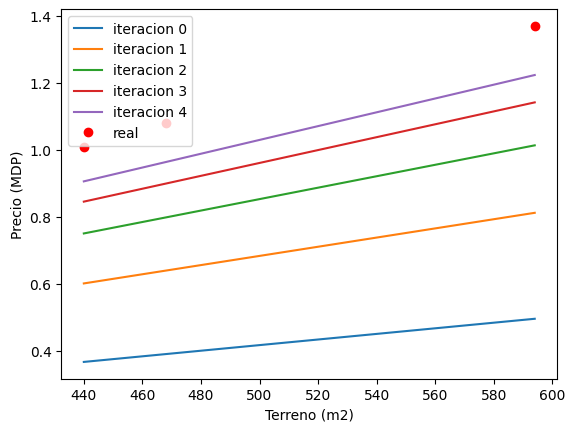

In [76]:
# Graficamos las iteraciones y_pred
line_space = np.linspace(0, 5, 10)
for i in range(len(y_pred)):
    plt.plot(x_real_test, (ws[i] * x_real_test), label=f'iteracion {i}')
    plt.xlabel('Terreno (m2)')
    plt.ylabel('Precio (MDP)')
plt.plot(x_real_test, y_real_test, 'ro', label='real')
plt.legend()
plt.show()

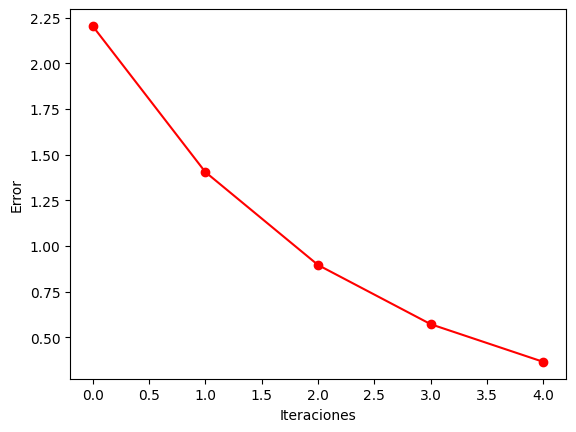

In [77]:
# Graficamos los puntos del error
plt.plot(range(len(error)), error, 'o-', color='red')
plt.xlabel('Iteraciones')
plt.ylabel('Error')
plt.show()